# **Random Forest**

As the *Random Forest* model is an ensamble Tree model, it shares a lot of hyperparmameters with a *Decision Tree* model. The additional  hyperparameters unique to a *Random Forest* model are:
* **Number of Estimators** (number of trees)
* **Number of Features** (number of features $m$ to include per subset of features)
* **Bootstrap Samples** (allow bootstrap sampling of each subset of features)
* **Out-Of-Bag (OOB) Error** (calculate OOB Error)



In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

In [56]:
penguins = pd.read_csv("data/penguins_size.csv")
penguins = penguins.dropna()
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [57]:
y = penguins['species']

X = penguins.drop('species', axis='columns')
X = pd.get_dummies(X, drop_first=True)
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,0,1
1,39.5,17.4,186.0,3800.0,0,1,1,0
2,40.3,18.0,195.0,3250.0,0,1,1,0
4,36.7,19.3,193.0,3450.0,0,1,1,0
5,39.3,20.6,190.0,3650.0,0,1,0,1


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

At each node split a random subset of features is chosen to base the split off. In the model definition a <code>random_state</code> parameter may be passed, which will ensure that the same "random" selection is made each time you run the model.

In [59]:
rfc_model = RandomForestClassifier(
    n_estimators=10, 
    max_features='sqrt',
    random_state=101
)

rfc_model.fit(X_train, y_train)
y_pred = rfc_model.predict(X_test)

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



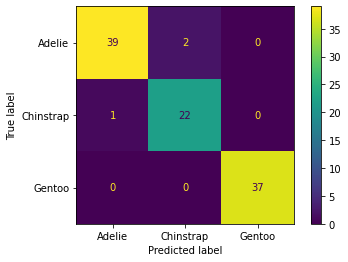

In [60]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(classification_report(y_test, y_pred))

In [61]:
data = pd.read_csv('data/data_banknote_authentication.csv')
data.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


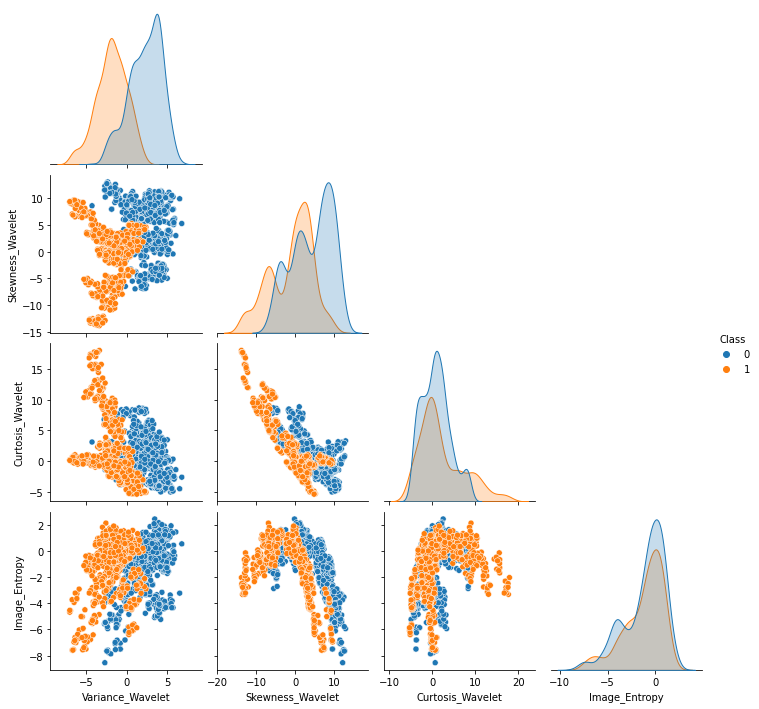

In [62]:
sns.pairplot(data, hue="Class", corner=True)

In [63]:
X = data.drop('Class', axis='columns')
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [64]:
n_estimators = [64, 100, 128, 200]
max_features = [2, 3, 4]  # this is m, could be sqrt(p) but there are only 4 features, so we can enter int values manually
bootstrap = [True, False]
oob_score = [True, False] # will raise errors, oob score can only be obtained if bootstrap=True

param_grid = dict(
    n_estimators=n_estimators,
    max_features=max_features,
    bootstrap=bootstrap,
    oob_score=oob_score,
)

In [65]:
model = RandomForestClassifier()
grid = GridSearchCV(model, param_grid)

In [66]:
grid.fit(X_train, y_train)

C:\Users\Gebruiker\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Gebruiker\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Gebruiker\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py", line 437, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=T

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [67]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 128, 'oob_score': False}

In [68]:
model = RandomForestClassifier(max_features=2, n_estimators=100, bootstrap=True, oob_score=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.oob_score_

0.9957118353344768

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.98      1.00      0.99        82

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206



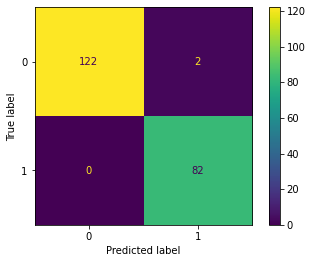

In [69]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(classification_report(y_test, y_pred))

In [71]:
errors = []
missclassifications = []

for n in range(1, 100):
    model = RandomForestClassifier(n_estimators=n, max_features=2)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    e = 1 - accuracy_score(y_true=y_test, y_pred=y_pred)
    n_missed = np.sum(y_pred != y_test)
    
    errors.append(e)
    missclassifications.append(n_missed)
    

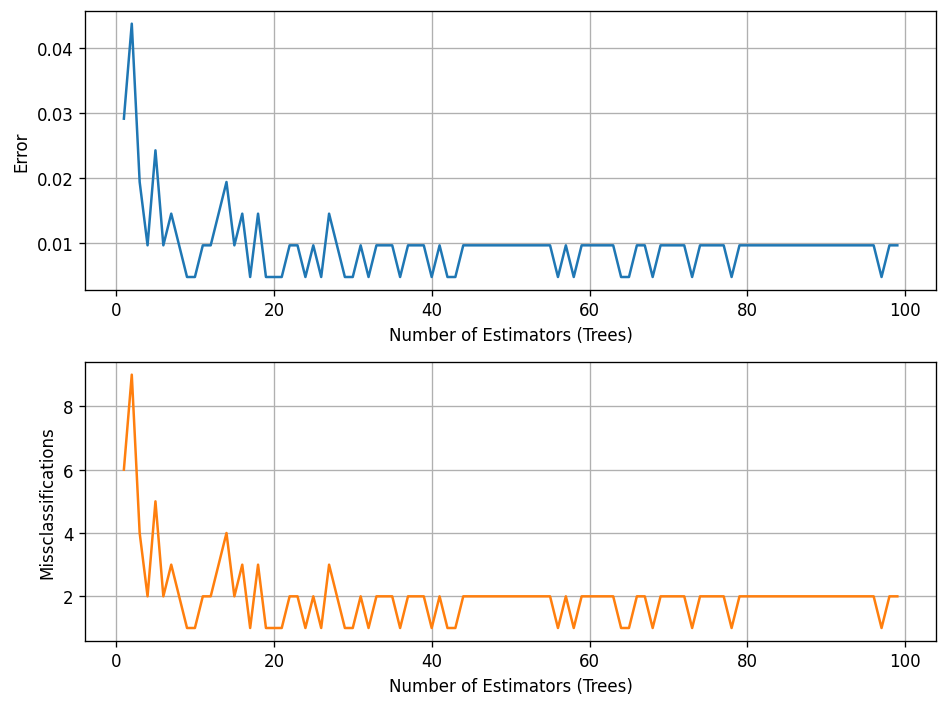

In [89]:
n = np.arange(1, 100)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,6), dpi=120)
ax1.plot(n, errors, 'tab:blue')
ax2.plot(n, missclassifications, 'tab:orange')

ax1.set_xlabel('Number of Estimators (Trees)')
ax2.set_xlabel('Number of Estimators (Trees)')

ax1.set_ylabel('Error')
ax2.set_ylabel('Missclassifications')

ax1.grid()
ax2.grid()
plt.tight_layout()
plt.show()